In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_features = market_data_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(market_data_df[numerical_features])

In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features, index=market_data_df.index)
# Copy the crypto names from the original data
crypto_names = market_data_df.index
# Set the coinid column as index
# Display sample data
scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append((kmeans.inertia_))

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia
})

# Display the DataFrame
elbow_df

c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


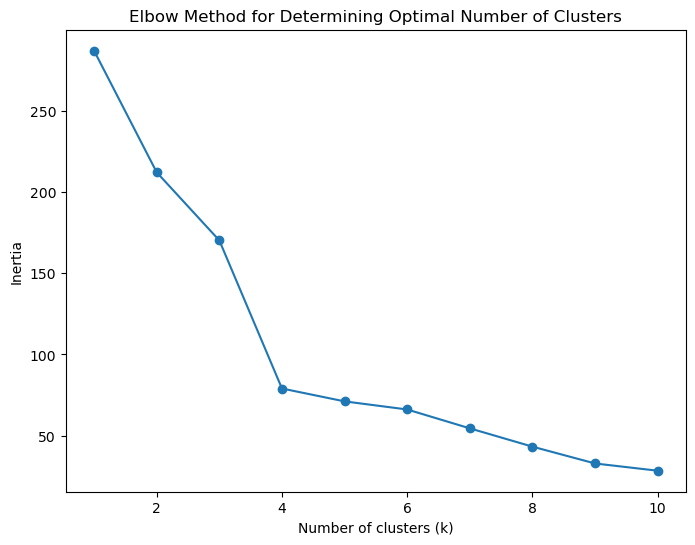

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=42)


In [11]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(scaled_df)
print("\nCluster Centers:")
print(kmeans_best.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_best.labels_)


Cluster Centers:
[[ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]
 [ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]]

Cluster Labels:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data# 
cluster_labels = kmeans_best.predict(scaled_df)


# View the resulting array of cluster values.
cluster_labels


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [13]:
# Create a copy of the DataFrame
market_data_df_copy = market_data_df.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_copy['Cluster'] = cluster_labels

# Display sample data
market_data_df_copy

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


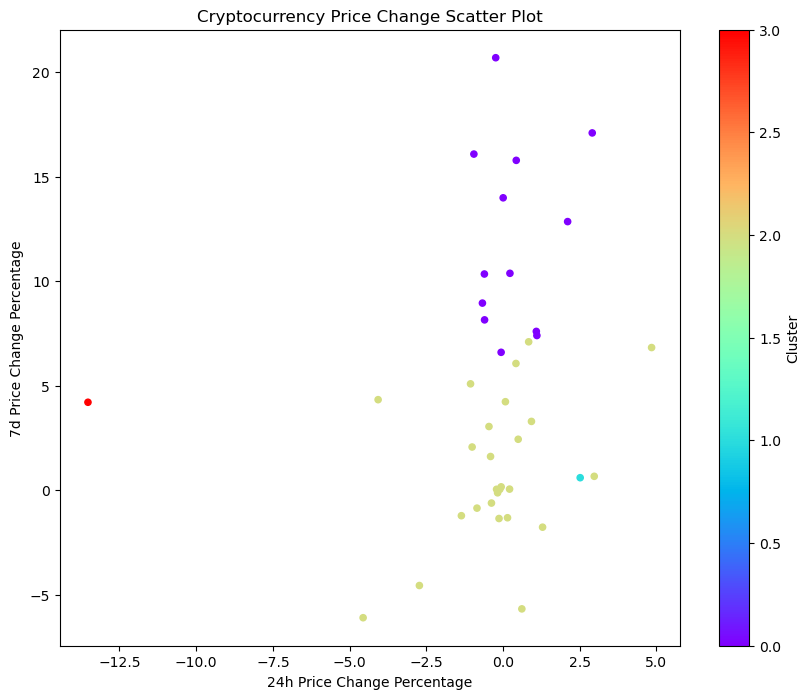

In [15]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_copy.plot(kind='scatter', x='price_change_percentage_24h', y='price_change_percentage_7d',
                         c='Cluster', colormap='rainbow', figsize=(10, 8), colorbar=True)

plt.title('Cryptocurrency Price Change Scatter Plot')
plt.xlabel('24h Price Change Percentage')
plt.ylabel('7d Price Change Percentage')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_features = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [18]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance:.2%}")


Explained Variance Ratio:
Principal Component 1: 37.20%
Principal Component 2: 34.70%
Principal Component 3: 17.60%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50%

In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'], index=market_data_df_copy.index)

# Copy the crypto names from the original data
pca_df['Cluster'] = cluster_labels
pca_df['Crypto Name'] = market_data_df_copy.index

# Set the coinid column as index


# Display sample data
(pca_df.head(10))

,PC1,PC2,PC3,Cluster,Crypto Name
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,bitcoin
ethereum,-0.458261,0.458466,0.952877,0,ethereum
tether,-0.433070,-0.168126,-0.641752,2,tether
ripple,-0.471835,-0.222660,-0.479053,2,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,0,bitcoin-cash
binancecoin,-0.516534,1.388377,0.804071,0,binancecoin
chainlink,-0.450711,0.517699,2.846143,0,chainlink
cardano,-0.345600,0.729439,1.478013,0,cardano
litecoin,-0.649468,0.432165,0.600303,0,litecoin


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
pca_features = pca_df[['PC1', 'PC2', 'PC3']]
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow2_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow2_df

c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


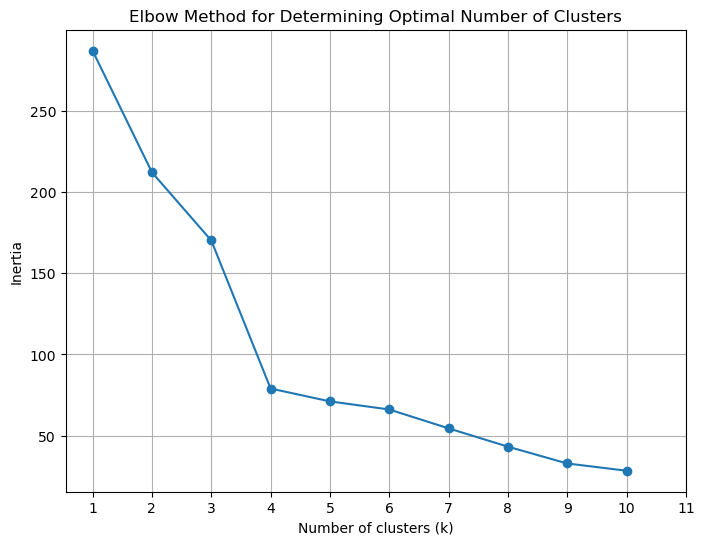

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_values)  # Ensure all k-values are shown on the x-axis
plt.grid(True)  # Add a grid for better readability
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

In [23]:
# Fit the K-Means model using the PCA data
kmeans_best.fit(pca_features)

c:\Users\gusgl\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [24]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_best.predict(pca_features)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [25]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_labels

# Display sample data
pca_df_copy

,PC1,PC2,PC3,Cluster,Crypto Name
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,bitcoin
ethereum,-0.458261,0.458466,0.952877,0,ethereum
tether,-0.433070,-0.168126,-0.641752,2,tether
ripple,-0.471835,-0.222660,-0.479053,2,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,0,bitcoin-cash
binancecoin,-0.516534,1.388377,0.804071,0,binancecoin
chainlink,-0.450711,0.517699,2.846143,0,chainlink
cardano,-0.345600,0.729439,1.478013,0,cardano
litecoin,-0.649468,0.432165,0.600303,0,litecoin


In [32]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
scatter_plot = pca_df_copy.hvplot.scatter(x='PC1', y='PC2', c='Cluster', size=10, title='Cryptocurrency PCA Scatter Plot with Clusters')
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [33]:
# Use the columns from the original scaled DataFrame as the index.
transposed_scaled_df = pca_df_copy.T
transposed_scaled_df



coin_id,bitcoin,ethereum,tether,ripple,bitcoin-cash,binancecoin,chainlink,cardano,litecoin,bitcoin-cash-sv,...,ethereum-classic,ethlend,maker,havven,omisego,celsius-degree-token,ontology,ftx-token,true-usd,digibyte
PC1,-0.600667,-0.458261,-0.43307,-0.471835,-1.1578,-0.516534,-0.450711,-0.3456,-0.649468,-0.759014,...,-0.579924,8.089018,-0.389045,0.865762,0.111675,4.792395,-0.632355,-0.593142,-0.458131,-0.29791
PC2,0.84276,0.458466,-0.168126,-0.22266,2.041209,1.388377,0.517699,0.729439,0.432165,-0.2012,...,-0.356334,-3.896891,0.165041,-2.261882,0.428316,6.767679,-2.108117,0.021485,-0.135734,-0.191126
PC3,0.461595,0.952877,-0.641752,-0.479053,1.859715,0.804071,2.846143,1.478013,0.600303,-0.217653,...,-0.114942,2.301382,0.379414,0.275583,-1.205398,-1.986985,-0.652227,0.209911,-0.635284,-0.909602
Cluster,0,0,2,2,0,0,0,0,0,2,...,2,3,0,2,2,1,2,2,2,2
Crypto Name,bitcoin,ethereum,tether,ripple,bitcoin-cash,binancecoin,chainlink,cardano,litecoin,bitcoin-cash-sv,...,ethereum-classic,ethlend,maker,havven,omisego,celsius-degree-token,ontology,ftx-token,true-usd,digibyte


In [34]:
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)

loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=numerical_features)

loadings_df

for component in loadings_df.columns:
    sorted_loadings = loadings_df[component].sort_values(ascending=False)
    print(f"\nFeatures with strongest positive influence on {component}:")
    print(sorted_loadings.head())
    print(f"\nFeatures with strongest negative influence on {component}:")
    print(sorted_loadings.tail())


Features with strongest positive influence on PC1:
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_60d     0.320365
price_change_percentage_30d     0.191523
price_change_percentage_14d    -0.009162
Name: PC1, dtype: float64

Features with strongest negative influence on PC1:
price_change_percentage_60d    0.320365
price_change_percentage_30d    0.191523
price_change_percentage_14d   -0.009162
price_change_percentage_7d    -0.102432
price_change_percentage_24h   -0.416728
Name: PC1, dtype: float64

Features with strongest positive influence on PC2:
price_change_percentage_30d    0.562182
price_change_percentage_14d    0.540415
price_change_percentage_60d    0.434040
price_change_percentage_24h    0.358162
price_change_percentage_7d     0.227432
Name: PC2, dtype: float64

Features with strongest negative influence on PC2:
price_change_percentage_60d     0.434040
price_change_percentage_24h     0.358162
price_change_percentage_7d 

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 


For PC1
    Strongest Positive = price_change_percentage_200d
    Strongest Negative = price_change_percentage_60d

For PC2
    Strongest Positive = price_change_percentage_30d
    Strongest Negative = price_change_percentage_60d

For PC3
    Strongest Positive = price_change_percentage_7d
    Strongest Negative = price_change_percentage_1y